In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
% cd drive/My\ Drive/CV_incubator/IncubatorCVProject-combine

/content/drive/My Drive/CV_incubator/IncubatorCVProject-combine


In [2]:
%matplotlib inline
import os
import re 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import cv2

In [3]:
# Path to the folder where all images are stored
data_path ='../dog-breed-identification'
anno_path = '../Annotation'

In [8]:
def create_cropped_image(data_path, anno_path):
    '''
    data_path: directory to the images
    anno_path: path to annotation file folder where all bounding boxes are saved
    '''
    cropped_data_path = '_'.join([data_path,'crop'])
    if os.path.exists(cropped_data_path):
      print("Cropped image folder already exists")
    else:
      os.mkdir(cropped_data_path)
    path = ['/'.join(img_fullname.split('/')[-2:]) for root, dirs, files in os.walk(anno_path)
                          for dir in dirs
                          for img_fullname in glob.glob(os.path.join(root,dir,'*'))]
    for p in path:
        # Create new folder if not exists
        dir = os.path.join(cropped_data_path, p.split('/')[0])
        if not os.path.exists(dir):
            os.mkdir(dir)
            print('Create {} folder'.format(p.split('/')[0]))
         # Read image
        img_file = os.path.join(data_path,p + '.jpg')
        img = cv2.imread(img_file)
        # Get bbox
        f = os.path.join(anno_path,p)
        with open (f, 'rt') as myfile:  # Open lorem.txt for reading text
            contents = myfile.read() 
            r = re.compile(r'<xmin>\d+ | <xmax>\d+ | <ymin>\d+ | <ymax>\d+', flags=re.I | re.X)
            bbox = r.findall(contents)
            n_dog = int(len(bbox)/4)
            for n in range(n_dog):
                xmin, ymin, xmax, ymax = [int(i.split('>')[-1]) for i in bbox[4*n:4*n+4]]
                # Crop and save
                cropped_img = img[ymin:ymax,xmin:xmax]
                if n > 0:
                    save_filename = os.path.join(cropped_data_path,p+'crop{}.jpg'.format(str(n)))
                else:
                    save_filename = os.path.join(cropped_data_path,p+'crop.jpg')
                cv2.imwrite(save_filename, cropped_img)

In [9]:
create_cropped_image(data_path, anno_path)

Cropped image folder already exists
Create n02095314-wire-haired_fox_terrier folder
Create n02099849-Chesapeake_Bay_retriever folder
Create n02097658-silky_terrier folder
Create n02104365-schipperke folder
Create n02091831-Saluki folder
Create n02113023-Pembroke folder
Create n02090622-borzoi folder
Create n02102318-cocker_spaniel folder
Create n02095889-Sealyham_terrier folder
Create n02105505-komondor folder
Create n02113799-standard_poodle folder
Create n02089973-English_foxhound folder
Create n02093256-Staffordshire_bullterrier folder
Create n02109961-Eskimo_dog folder
Create n02085782-Japanese_spaniel folder
Create n02110063-malamute folder
Create n02099601-golden_retriever folder
Create n02097047-miniature_schnauzer folder
Create n02113978-Mexican_hairless folder
Create n02086079-Pekinese folder
Create n02097209-standard_schnauzer folder
Create n02105162-malinois folder
Create n02107142-Doberman folder
Create n02097130-giant_schnauzer folder
Create n02106662-German_shepherd folde

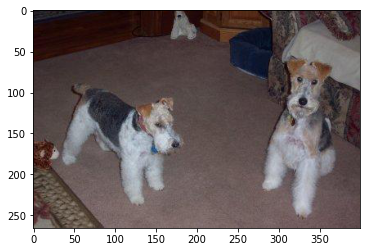

In [22]:
img = plt.imread('../dog-breed-identification/n02095314-wire-haired_fox_terrier/n02095314_2139.jpg')
plt.imshow(img)